# Eksplorasi

In [ ]:
import pandas as pd
import os
from datetime import datetime, date
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,Unnamed: 0,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Female,1950-01-12,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0.0,"9767 Snyder Summit Suite 944\r\nWest Jesse, FL...",erinfox@jones.info,16.0,NBF,5.0,NaN,1.0,R
1,1,Male,1965-01-08,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0.0,"89313 Christina Divide\r\nGarciatown, ME 71630",ykoch@gmail.com,2.0,PUB,47.0,S,1.0,I
2,2,Female,1997-12-31,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0.0,"896 Benjamin Shore Suite 035\r\nSamuelhaven, T...",wolfekayla@mills.com,13.0,PVT,189.0,NaN,1.0,I
3,3,Male,1963-01-09,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0.0,"706 Crystal Roads\r\nNorth Marcus, NE 73557",ejackson@taylor.net,16.0,NBF,5.0,NaN,1.0,R
4,4,Female,1996-01-01,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1.0,"821 Sara Falls Apt. 775\r\nSouth Sarah, AZ 45554",cannonshawn@strong.com,99.0,BRO,5.0,NaN,1.0,R


In [ ]:
df.dtypes
#akan dihapus :email

Unnamed: 0                int64
gender                   object
date_of_birth            object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                float64
address                  object
email                    object
inquiry_purpose_code    float64
institute_type           object
account_type            float64
asset_class_cd           object
asset_code              float64
portfolio_type           object
dtype: object

In [ ]:
# date_of_birth1 = pd.to_datetime(df['date_of_birth'])
# df['date_of_birth'].replace(date_of_birth1, inplace=True)

In [ ]:
df.dtypes

Unnamed: 0                int64
gender                   object
date_of_birth            object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                float64
address                  object
email                    object
inquiry_purpose_code    float64
institute_type           object
account_type            float64
asset_class_cd           object
asset_code              float64
portfolio_type           object
dtype: object

In [ ]:
df

,Unnamed: 0,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Female,1950-01-12,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0.0,"9767 Snyder Summit Suite 944\r\nWest Jesse, FL...",erinfox@jones.info,16.0,NBF,5.0,NaN,1.0,R
1,1,Male,1965-01-08,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0.0,"89313 Christina Divide\r\nGarciatown, ME 71630",ykoch@gmail.com,2.0,PUB,47.0,S,1.0,I
2,2,Female,1997-12-31,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0.0,"896 Benjamin Shore Suite 035\r\nSamuelhaven, T...",wolfekayla@mills.com,13.0,PVT,189.0,NaN,1.0,I
3,3,Male,1963-01-09,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0.0,"706 Crystal Roads\r\nNorth Marcus, NE 73557",ejackson@taylor.net,16.0,NBF,5.0,NaN,1.0,R
4,4,Female,1996-01-01,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1.0,"821 Sara Falls Apt. 775\r\nSouth Sarah, AZ 45554",cannonshawn@strong.com,99.0,BRO,5.0,NaN,1.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,10689,Male,1976-01-06,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,1.0,"6228 Sanders Brooks\r\nMitchellberg, WY 56143",espinozaryan@dean.org,99.0,PVT,5.0,NaN,1.0,R
10690,10690,Male,1965-01-08,Private,HS-grad,9.0,Divorced,Craft-repair,Not-in-family,0.0,0.0,40.0,0.0,"786 Elizabeth Union\r\nConnieburgh, NM 47564",ibrown@singleton-clark.biz,13.0,NBF,189.0,NaN,1.0,I
10691,10691,Male,1989-01-02,Private,Masters,14.0,Never-married,Adm-clerical,Not-in-family,0.0,0.0,60.0,1.0,"PSC 5549, Box 3215\r\nAPO AP 22881",heatherford@gmail.com,99.0,PVT,5.0,NaN,1.0,R
10692,10692,Male,1963-01-09,Private,10th,6.0,Married-civ-spouse,Other-service,Husband,0.0,0.0,40.0,0.0,"19851 Rocha Ranch\r\nRebeccaview, RI 47927",fordbryan@robinson.com,7.0,PVT,5.0,NaN,1.0,R


In [ ]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['Age'] = df['date_of_birth'].apply(age)
  
display(df)

,Unnamed: 0,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,Age
0,0,Female,1950-01-12,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0.0,"9767 Snyder Summit Suite 944\r\nWest Jesse, FL...",erinfox@jones.info,16.0,NBF,5.0,NaN,1.0,R,71
1,1,Male,1965-01-08,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0.0,"89313 Christina Divide\r\nGarciatown, ME 71630",ykoch@gmail.com,2.0,PUB,47.0,S,1.0,I,56
2,2,Female,1997-12-31,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0.0,"896 Benjamin Shore Suite 035\r\nSamuelhaven, T...",wolfekayla@mills.com,13.0,PVT,189.0,NaN,1.0,I,23
3,3,Male,1963-01-09,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0.0,"706 Crystal Roads\r\nNorth Marcus, NE 73557",ejackson@taylor.net,16.0,NBF,5.0,NaN,1.0,R,58
4,4,Female,1996-01-01,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1.0,"821 Sara Falls Apt. 775\r\nSouth Sarah, AZ 45554",cannonshawn@strong.com,99.0,BRO,5.0,NaN,1.0,R,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,10689,Male,1976-01-06,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,1.0,"6228 Sanders Brooks\r\nMitchellberg, WY 56143",espinozaryan@dean.org,99.0,PVT,5.0,NaN,1.0,R,45
10690,10690,Male,1965-01-08,Private,HS-grad,9.0,Divorced,Craft-repair,Not-in-family,0.0,0.0,40.0,0.0,"786 Elizabeth Union\r\nConnieburgh, NM 47564",ibrown@singleton-clark.biz,13.0,NBF,189.0,NaN,1.0,I,56
10691,10691,Male,1989-01-02,Private,Masters,14.0,Never-married,Adm-clerical,Not-in-family,0.0,0.0,60.0,1.0,"PSC 5549, Box 3215\r\nAPO AP 22881",heatherford@gmail.com,99.0,PVT,5.0,NaN,1.0,R,32
10692,10692,Male,1963-01-09,Private,10th,6.0,Married-civ-spouse,Other-service,Husband,0.0,0.0,40.0,0.0,"19851 Rocha Ranch\r\nRebeccaview, RI 47927",fordbryan@robinson.com,7.0,PVT,5.0,NaN,1.0,R,58


In [ ]:
df1 = df.drop(columns=['address', 'email','asset_class_cd','Unnamed: 0','date_of_birth'])
df1

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,Female,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0.0,16.0,NBF,5.0,1.0,R,71
1,Male,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0.0,2.0,PUB,47.0,1.0,I,56
2,Female,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0.0,13.0,PVT,189.0,1.0,I,23
3,Male,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0.0,16.0,NBF,5.0,1.0,R,58
4,Female,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1.0,99.0,BRO,5.0,1.0,R,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,Male,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,1.0,99.0,PVT,5.0,1.0,R,45
10690,Male,Private,HS-grad,9.0,Divorced,Craft-repair,Not-in-family,0.0,0.0,40.0,0.0,13.0,NBF,189.0,1.0,I,56
10691,Male,Private,Masters,14.0,Never-married,Adm-clerical,Not-in-family,0.0,0.0,60.0,1.0,99.0,PVT,5.0,1.0,R,32
10692,Male,Private,10th,6.0,Married-civ-spouse,Other-service,Husband,0.0,0.0,40.0,0.0,7.0,PVT,5.0,1.0,R,58


In [ ]:
df1 = df1.drop_duplicates()
df1

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,Female,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0.0,16.0,NBF,5.0,1.0,R,71
1,Male,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0.0,2.0,PUB,47.0,1.0,I,56
2,Female,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0.0,13.0,PVT,189.0,1.0,I,23
3,Male,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0.0,16.0,NBF,5.0,1.0,R,58
4,Female,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1.0,99.0,BRO,5.0,1.0,R,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,Male,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,1.0,99.0,PVT,5.0,1.0,R,45
10690,Male,Private,HS-grad,9.0,Divorced,Craft-repair,Not-in-family,0.0,0.0,40.0,0.0,13.0,NBF,189.0,1.0,I,56
10691,Male,Private,Masters,14.0,Never-married,Adm-clerical,Not-in-family,0.0,0.0,60.0,1.0,99.0,PVT,5.0,1.0,R,32
10692,Male,Private,10th,6.0,Married-civ-spouse,Other-service,Husband,0.0,0.0,40.0,0.0,7.0,PVT,5.0,1.0,R,58


In [ ]:
df1.isnull().sum()

gender                    0
workclass                 0
education_level           1
education_num             1
marital_status            1
occupation                1
relationship              1
capital_gain              1
capital_loss              1
hours_per_week            1
approved                  1
inquiry_purpose_code    301
institute_type            1
account_type              1
asset_code               23
portfolio_type            3
Age                       0
dtype: int64

In [ ]:
df1["inquiry_purpose_code"].value_counts()

13.0    4850
99.0    2035
7.0     1358
16.0     836
2.0      575
14.0     257
6.0      118
1.0       83
10.0      66
8.0       39
5.0       27
11.0      26
3.0       20
4.0       11
17.0       8
18.0       3
12.0       1
9.0        1
Name: inquiry_purpose_code, dtype: int64

In [ ]:
df1["asset_code"].value_counts()

1.0     10267
2.0       264
4.0        46
19.0       15
Name: asset_code, dtype: int64

In [ ]:
df1["portfolio_type"].value_counts()

R    6322
I    4022
M     265
F       3
Name: portfolio_type, dtype: int64

In [ ]:
df1 = df1.fillna(0)

In [ ]:
df1.isnull().sum()

gender                  0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
approved                0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          0
Age                     0
dtype: int64

In [ ]:
print(df1["inquiry_purpose_code"].value_counts())
print(df1["asset_code"].value_counts())
print(df1["portfolio_type"].value_counts())

13.0    4850
99.0    2035
7.0     1358
16.0     836
2.0      575
0.0      301
14.0     257
6.0      118
1.0       83
10.0      66
8.0       39
5.0       27
11.0      26
3.0       20
4.0       11
17.0       8
18.0       3
12.0       1
9.0        1
Name: inquiry_purpose_code, dtype: int64
1.0     10267
2.0       264
4.0        46
0.0        23
19.0       15
Name: asset_code, dtype: int64
R    6322
I    4022
M     265
F       3
0       3
Name: portfolio_type, dtype: int64


In [ ]:
df1.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                float64
inquiry_purpose_code    float64
institute_type           object
account_type            float64
asset_code              float64
portfolio_type           object
Age                       int64
dtype: object

In [ ]:
column_name = list(df1.columns)
column_name

['gender',
 'workclass',
 'education_level',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'approved',
 'inquiry_purpose_code',
 'institute_type',
 'account_type',
 'asset_code',
 'portfolio_type',
 'Age']

In [ ]:
ganti = {       "gender": {' Female': 1.0, " Male": 2.0},
                "workclass" : {" Private" : 1.0, " Self-emp-not-inc" : 2.0,
                               " Local-gov" : 3.0, " State-gov" : 4.0,
                                " Self-emp-inc" : 5.0, " Federal-gov" : 6.0, " Without-pay" : 7.0},
                
                "education_level" : {" HS-grad" : 1.0, " Some-college" : 2.0,
                                    " Bachelors" : 3.0, " Masters" : 4.0,
                                    " Assoc-voc" : 5.0, " 11th" : 6.0, 
                                    " Assoc-acdm" : 7.0, " 10th" : 8.0,
                                    " 7th-8th" : 9.0, " Prof-school" : 10.0,
                                    " 9th" : 11.0, " 12th" : 12.0,
                                    " Doctorate" : 13.0, " 5th-6th" : 14.0,
                                    " 1st-4th" : 15.0, " Preschool" : 16.0},
                
                "marital_status" : {" Married-civ-spouse" : 1.0, " Never-married" : 2.0,
                                    " Divorced" : 3.0, " Separated" : 4.0,
                                    " Widowed" : 5.0, " Married-spouse-absent" : 6.0, " Married-AF-spouse" : 7.0},
                
                "occupation" : {" Exec-managerial" : 1.0, " Prof-specialty" : 2.0,
                                " Craft-repair" : 3.0, " Adm-clerical" : 4.0,
                                " Sales" : 5.0, " Other-service" : 6.0, 
                                " Machine-op-inspct" : 7.0, " Transport-moving" : 8.0,
                                " Handlers-cleaners" : 9.0, " Farming-fishing" : 10.0,
                                " Tech-support" : 11.0, " Protective-serv" : 12.0,
                                " Priv-house-serv" : 13.0, " Armed-Forces" : 14.0,},
                
                "relationship" : {" Husband" : 1.0, " Not-in-family" : 2.0,
                                  " Own-child" : 3.0, " Unmarried" : 4.0,
                                  " Wife" : 5.0, " Other-relative" : 6.0},
                
                "institute_type" : {"PVT" : 1.0, "NBF" : 2.0,
                                    "PUB" : 3.0, "HFC" : 4.0,
                                    "BRO" : 5.0, "FOR" : 6.0, 
                                    "COB" : 7.0, "INS" : 8.0,
                                    "TEL" : 9.0, "SRC" : 10.0},
                
                "portfolio_type" : {"R" : 1.0, "I" : 2.0,
                                  "M" : 3.0, "F" : 4.0}}
df1.replace(ganti, inplace=True)
df1.dtypes

gender                  float64
workclass               float64
education_level         float64
education_num           float64
marital_status          float64
occupation              float64
relationship            float64
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                float64
inquiry_purpose_code    float64
institute_type          float64
account_type            float64
asset_code              float64
portfolio_type          float64
Age                       int64
dtype: object

In [ ]:
# df['gender'].unique()
# df['workclass'].unique()
# df['education_level'].unique()
# df['marital_status'].unique()
# df['relationship'].unique()

In [ ]:
# print(df1["gender"].value_counts())
# print(df1["workclass"].value_counts())
# print(df1["education_level"].value_counts())
# print(df1["marital_status"].value_counts())
# print(df1["occupation"].value_counts())
# print(df1["relationship"].value_counts())
# print(df1["institute_type"].value_counts())
# print(df1["portfolio_type"].value_counts())

In [ ]:
df1

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,1.0,3.0,1.0,9.0,5.0,4.0,2.0,0.0,0.0,12.0,0.0,16.0,2.0,5.0,1.0,1.0,71
1,2.0,1.0,5.0,11.0,1.0,7.0,1.0,0.0,0.0,20.0,0.0,2.0,3.0,47.0,1.0,2.0,56
2,1.0,1.0,5.0,11.0,2.0,13.0,2.0,0.0,0.0,30.0,0.0,13.0,1.0,189.0,1.0,2.0,23
3,2.0,3.0,2.0,10.0,5.0,1.0,2.0,6849.0,0.0,40.0,0.0,16.0,2.0,5.0,1.0,1.0,58
4,1.0,2.0,3.0,13.0,1.0,2.0,6.0,0.0,0.0,20.0,1.0,99.0,5.0,5.0,1.0,1.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,2.0,1.0,3.0,13.0,1.0,2.0,1.0,0.0,0.0,45.0,1.0,99.0,1.0,5.0,1.0,1.0,45
10690,2.0,1.0,1.0,9.0,3.0,3.0,2.0,0.0,0.0,40.0,0.0,13.0,2.0,189.0,1.0,2.0,56
10691,2.0,1.0,4.0,14.0,2.0,4.0,2.0,0.0,0.0,60.0,1.0,99.0,1.0,5.0,1.0,1.0,32
10692,2.0,1.0,8.0,6.0,1.0,6.0,1.0,0.0,0.0,40.0,0.0,7.0,1.0,5.0,1.0,1.0,58


In [ ]:
df1.describe()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
count,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000
mean,1.673575,1.664343,3.410268,10.118983,1.877343,4.832784,2.216298,1087.279322,87.579746,41.034668,0.243523,27.757325,1.522939,80.555629,1.061140,1.429392,39.330005
std,0.468927,1.308790,3.142497,2.554968,1.092840,2.972999,1.360268,7361.724087,402.392086,11.989621,0.429228,34.916923,0.796767,144.763114,0.721244,0.545191,13.278740
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,1.000000,1.000000,1.000000,9.000000,1.000000,2.000000,1.000000,0.000000,0.000000,40.000000,0.000000,13.000000,1.000000,5.000000,1.000000,1.000000,29.000000
50%,2.000000,1.000000,2.000000,10.000000,2.000000,4.000000,2.000000,0.000000,0.000000,40.000000,0.000000,13.000000,1.000000,5.000000,1.000000,1.000000,38.000000
75%,2.000000,2.000000,4.000000,13.000000,2.000000,7.000000,3.000000,0.000000,0.000000,45.000000,0.000000,16.000000,2.000000,173.000000,1.000000,2.000000,48.000000
max,2.000000,7.000000,16.000000,16.000000,7.000000,14.000000,6.000000,99999.000000,3900.000000,99.000000,1.000000,99.000000,9.000000,999.000000,19.000000,4.000000,91.000000


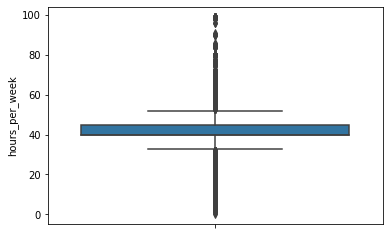

In [ ]:
import seaborn as sns
sns.boxplot(y=df1['hours_per_week'])

In [ ]:
df1_1 = df1[['capital_gain','capital_loss']]
df1_1

,capital_gain,capital_loss
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,6849.0,0.0
4,0.0,0.0
...,...,...
10689,0.0,0.0
10690,0.0,0.0
10691,0.0,0.0
10692,0.0,0.0


In [ ]:
df1_2 = df1.drop(['capital_gain','capital_loss'], axis=1)
df1_2

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,1.0,3.0,1.0,9.0,5.0,4.0,2.0,12.0,0.0,16.0,2.0,5.0,1.0,1.0,71
1,2.0,1.0,5.0,11.0,1.0,7.0,1.0,20.0,0.0,2.0,3.0,47.0,1.0,2.0,56
2,1.0,1.0,5.0,11.0,2.0,13.0,2.0,30.0,0.0,13.0,1.0,189.0,1.0,2.0,23
3,2.0,3.0,2.0,10.0,5.0,1.0,2.0,40.0,0.0,16.0,2.0,5.0,1.0,1.0,58
4,1.0,2.0,3.0,13.0,1.0,2.0,6.0,20.0,1.0,99.0,5.0,5.0,1.0,1.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,2.0,1.0,3.0,13.0,1.0,2.0,1.0,45.0,1.0,99.0,1.0,5.0,1.0,1.0,45
10690,2.0,1.0,1.0,9.0,3.0,3.0,2.0,40.0,0.0,13.0,2.0,189.0,1.0,2.0,56
10691,2.0,1.0,4.0,14.0,2.0,4.0,2.0,60.0,1.0,99.0,1.0,5.0,1.0,1.0,32
10692,2.0,1.0,8.0,6.0,1.0,6.0,1.0,40.0,0.0,7.0,1.0,5.0,1.0,1.0,58


In [ ]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# std_scaler
# df_std = pd.DataFrame(std_scaler.fit_transform(df1_1), 
# columns=df1_1.columns)
# df_std

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df1_1)

print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

df1_1 = pd.DataFrame(data=data_scaled, index=df1.index, columns= 
df1_1.columns)
df1_1

Min :  [0. 0.]
Max :  [1. 1.]


,capital_gain,capital_loss
0,0.000000,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.068491,0.0
4,0.000000,0.0
...,...,...
10689,0.000000,0.0
10690,0.000000,0.0
10691,0.000000,0.0
10692,0.000000,0.0


In [ ]:
# import seaborn as sns
# sns.boxplot(y=df1_1['capital_gain']) coba skip normalisasi

In [ ]:
df1 = pd.concat([df1_1, df1_2], axis = 1)
df1

,capital_gain,capital_loss,gender,workclass,education_level,education_num,marital_status,occupation,relationship,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,0.000000,0.0,1.0,3.0,1.0,9.0,5.0,4.0,2.0,12.0,0.0,16.0,2.0,5.0,1.0,1.0,71
1,0.000000,0.0,2.0,1.0,5.0,11.0,1.0,7.0,1.0,20.0,0.0,2.0,3.0,47.0,1.0,2.0,56
2,0.000000,0.0,1.0,1.0,5.0,11.0,2.0,13.0,2.0,30.0,0.0,13.0,1.0,189.0,1.0,2.0,23
3,0.068491,0.0,2.0,3.0,2.0,10.0,5.0,1.0,2.0,40.0,0.0,16.0,2.0,5.0,1.0,1.0,58
4,0.000000,0.0,1.0,2.0,3.0,13.0,1.0,2.0,6.0,20.0,1.0,99.0,5.0,5.0,1.0,1.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,0.000000,0.0,2.0,1.0,3.0,13.0,1.0,2.0,1.0,45.0,1.0,99.0,1.0,5.0,1.0,1.0,45
10690,0.000000,0.0,2.0,1.0,1.0,9.0,3.0,3.0,2.0,40.0,0.0,13.0,2.0,189.0,1.0,2.0,56
10691,0.000000,0.0,2.0,1.0,4.0,14.0,2.0,4.0,2.0,60.0,1.0,99.0,1.0,5.0,1.0,1.0,32
10692,0.000000,0.0,2.0,1.0,8.0,6.0,1.0,6.0,1.0,40.0,0.0,7.0,1.0,5.0,1.0,1.0,58


# Data Test

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test.head()

,Index,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Male,1996-12-31,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,"4310 Carr Keys Apt. 547\r\nNicoletown, MA 99102",krobinson@miller.com,13.0,PVT,47,S,1.0,I
1,1,Male,1988-01-03,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,"PSC 5755, Box 6774\r\nAPO AA 51628",jillwood@yahoo.com,99.0,PVT,5,NaN,1.0,R
2,2,Male,1970-01-07,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,USS Spence\r\nFPO AA 93452,mhobbs@hotmail.com,99.0,PVT,189,NaN,1.0,I
3,3,Male,1995-01-01,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,"141 Dennis Bypass\r\nWest Tony, NC 22819",thill@gmail.com,99.0,PVT,5,NaN,1.0,R
4,4,Female,1983-01-04,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,"384 Christopher Pine\r\nLeemouth, OR 39895",ocarlson@yahoo.com,13.0,PVT,189,S,1.0,I


In [ ]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_test['Age'] = df_test['date_of_birth'].apply(age)
display(df_test)

,Index,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,Age
0,0,Male,1996-12-31,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,"4310 Carr Keys Apt. 547\r\nNicoletown, MA 99102",krobinson@miller.com,13.0,PVT,47,S,1.0,I,24
1,1,Male,1988-01-03,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,"PSC 5755, Box 6774\r\nAPO AA 51628",jillwood@yahoo.com,99.0,PVT,5,NaN,1.0,R,33
2,2,Male,1970-01-07,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,USS Spence\r\nFPO AA 93452,mhobbs@hotmail.com,99.0,PVT,189,NaN,1.0,I,51
3,3,Male,1995-01-01,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,"141 Dennis Bypass\r\nWest Tony, NC 22819",thill@gmail.com,99.0,PVT,5,NaN,1.0,R,26
4,4,Female,1983-01-04,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,"384 Christopher Pine\r\nLeemouth, OR 39895",ocarlson@yahoo.com,13.0,PVT,189,S,1.0,I,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,13562,Male,1980-01-05,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,40.0,"2714 Elizabeth Bridge\r\nCodyfort, AZ 20810",yflores@mcdowell.org,16.0,PVT,173,S,1.0,I,41
13563,13563,Female,1982-01-04,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Wife,0.0,0.0,50.0,"172 Jerry Flat Apt. 575\r\nNew Zacharyhaven, O...",phutchinson@yahoo.com,99.0,PVT,5,NaN,1.0,R,39
13564,13564,Male,1982-01-04,Private,Some-college,10.0,Never-married,Other-service,Not-in-family,0.0,0.0,46.0,"65847 Karen Camp Apt. 185\r\nLake Jeremy, NM 4...",hrice@tucker.com,99.0,PVT,5,NaN,1.0,R,39
13565,13565,Male,1996-01-01,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,0.0,0.0,45.0,6171 Ronald Fields Suite 614\r\nChristophersta...,kimbaker@ross.com,7.0,PVT,5,NaN,1.0,R,25


In [ ]:
df_test = df_test.drop(columns=['address', 'email','asset_class_cd','Index','date_of_birth'])
df_test

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,Male,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,13.0,PVT,47,1.0,I,24
1,Male,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,99.0,PVT,5,1.0,R,33
2,Male,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,99.0,PVT,189,1.0,I,51
3,Male,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,99.0,PVT,5,1.0,R,26
4,Female,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,13.0,PVT,189,1.0,I,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,Male,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,40.0,16.0,PVT,173,1.0,I,41
13563,Female,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Wife,0.0,0.0,50.0,99.0,PVT,5,1.0,R,39
13564,Male,Private,Some-college,10.0,Never-married,Other-service,Not-in-family,0.0,0.0,46.0,99.0,PVT,5,1.0,R,39
13565,Male,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,0.0,0.0,45.0,7.0,PVT,5,1.0,R,25


In [ ]:
df_test.isnull().sum()

gender                    0
workclass                 0
education_level           0
education_num             0
marital_status            0
occupation                0
relationship              0
capital_gain              0
capital_loss              0
hours_per_week            0
inquiry_purpose_code    374
institute_type            0
account_type              0
asset_code               19
portfolio_type            3
Age                       0
dtype: int64

In [ ]:
df_test = df_test.fillna(0)
df_test.isnull().sum()

gender                  0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          0
Age                     0
dtype: int64

In [ ]:
df_test.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_code              float64
portfolio_type           object
Age                       int64
dtype: object

In [ ]:
ganti = {       "gender": {' Female': 1.0, " Male": 2.0},
                "workclass" : {" Private" : 1.0, " Self-emp-not-inc" : 2.0,
                               " Local-gov" : 3.0, " State-gov" : 4.0,
                                " Self-emp-inc" : 5.0, " Federal-gov" : 6.0, " Without-pay" : 7.0},
                
                "education_level" : {" HS-grad" : 1.0, " Some-college" : 2.0,
                                    " Bachelors" : 3.0, " Masters" : 4.0,
                                    " Assoc-voc" : 5.0, " 11th" : 6.0, 
                                    " Assoc-acdm" : 7.0, " 10th" : 8.0,
                                    " 7th-8th" : 9.0, " Prof-school" : 10.0,
                                    " 9th" : 11.0, " 12th" : 12.0,
                                    " Doctorate" : 13.0, " 5th-6th" : 14.0,
                                    " 1st-4th" : 15.0, " Preschool" : 16.0},
                
                "marital_status" : {" Married-civ-spouse" : 1.0, " Never-married" : 2.0,
                                    " Divorced" : 3.0, " Separated" : 4.0,
                                    " Widowed" : 5.0, " Married-spouse-absent" : 6.0, " Married-AF-spouse" : 7.0},
                
                "occupation" : {" Exec-managerial" : 1.0, " Prof-specialty" : 2.0,
                                " Craft-repair" : 3.0, " Adm-clerical" : 4.0,
                                " Sales" : 5.0, " Other-service" : 6.0, 
                                " Machine-op-inspct" : 7.0, " Transport-moving" : 8.0,
                                " Handlers-cleaners" : 9.0, " Farming-fishing" : 10.0,
                                " Tech-support" : 11.0, " Protective-serv" : 12.0,
                                " Priv-house-serv" : 13.0, " Armed-Forces" : 14.0,},
                
                "relationship" : {" Husband" : 1.0, " Not-in-family" : 2.0,
                                  " Own-child" : 3.0, " Unmarried" : 4.0,
                                  " Wife" : 5.0, " Other-relative" : 6.0},
                
                "institute_type" : {"PVT" : 1.0, "NBF" : 2.0,
                                    "PUB" : 3.0, "HFC" : 4.0,
                                    "BRO" : 5.0, "FOR" : 6.0, 
                                    "COB" : 7.0, "INS" : 8.0,
                                    "TEL" : 9.0, "SRC" : 10.0},
                
                "portfolio_type" : {"R" : 1.0, "I" : 2.0,
                                  "M" : 3.0, "F" : 4.0}}
df_test.replace(ganti, inplace=True)
df_test.dtypes

gender                  float64
workclass               float64
education_level         float64
education_num           float64
marital_status          float64
occupation              float64
relationship            float64
capital_gain            float64
capital_loss            float64
hours_per_week          float64
inquiry_purpose_code    float64
institute_type          float64
account_type              int64
asset_code              float64
portfolio_type          float64
Age                       int64
dtype: object

In [ ]:
df_test_1 = df_test[['capital_gain','capital_loss']]
df_test_1

,capital_gain,capital_loss
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
13562,0.0,0.0
13563,0.0,0.0
13564,0.0,0.0
13565,0.0,0.0


In [ ]:
df_test_1.describe()

,capital_gain,capital_loss
count,13567.000000,13567.000000
mean,1130.773863,84.304563
std,7710.529584,396.181750
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,3770.000000


In [ ]:
df_test_2 = df_test.drop(['capital_gain','capital_loss'], axis=1)
df_test_2

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,2.0,1.0,2.0,10.0,2.0,1.0,2.0,40.0,13.0,1.0,47,1.0,2.0,24
1,2.0,1.0,1.0,9.0,1.0,9.0,1.0,38.0,99.0,1.0,5,1.0,1.0,33
2,2.0,3.0,4.0,14.0,1.0,2.0,1.0,45.0,99.0,1.0,189,1.0,2.0,51
3,2.0,1.0,1.0,9.0,1.0,3.0,1.0,40.0,99.0,1.0,5,1.0,1.0,26
4,1.0,1.0,1.0,9.0,3.0,6.0,2.0,30.0,13.0,1.0,189,1.0,2.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,2.0,1.0,1.0,9.0,1.0,7.0,1.0,40.0,16.0,1.0,173,1.0,2.0,41
13563,1.0,1.0,3.0,13.0,1.0,1.0,5.0,50.0,99.0,1.0,5,1.0,1.0,39
13564,2.0,1.0,2.0,10.0,2.0,6.0,2.0,46.0,99.0,1.0,5,1.0,1.0,39
13565,2.0,1.0,1.0,9.0,2.0,9.0,4.0,45.0,7.0,1.0,5,1.0,1.0,25


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_test_1)

print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

df_test_1 = pd.DataFrame(data=data_scaled, columns= 
df_test_1.columns)
df_test_1

Min :  [0. 0.]
Max :  [1. 1.]


,capital_gain,capital_loss
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
13562,0.0,0.0
13563,0.0,0.0
13564,0.0,0.0
13565,0.0,0.0


In [ ]:
df_test_1.describe()

,capital_gain,capital_loss
count,13567.000000,13567.000000
mean,0.011308,0.022362
std,0.077106,0.105088
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
df_test = pd.concat([df_test_1, df_test_2], axis = 1)
df_test

,capital_gain,capital_loss,gender,workclass,education_level,education_num,marital_status,occupation,relationship,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,0.0,0.0,2.0,1.0,2.0,10.0,2.0,1.0,2.0,40.0,13.0,1.0,47,1.0,2.0,24
1,0.0,0.0,2.0,1.0,1.0,9.0,1.0,9.0,1.0,38.0,99.0,1.0,5,1.0,1.0,33
2,0.0,0.0,2.0,3.0,4.0,14.0,1.0,2.0,1.0,45.0,99.0,1.0,189,1.0,2.0,51
3,0.0,0.0,2.0,1.0,1.0,9.0,1.0,3.0,1.0,40.0,99.0,1.0,5,1.0,1.0,26
4,0.0,0.0,1.0,1.0,1.0,9.0,3.0,6.0,2.0,30.0,13.0,1.0,189,1.0,2.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,0.0,0.0,2.0,1.0,1.0,9.0,1.0,7.0,1.0,40.0,16.0,1.0,173,1.0,2.0,41
13563,0.0,0.0,1.0,1.0,3.0,13.0,1.0,1.0,5.0,50.0,99.0,1.0,5,1.0,1.0,39
13564,0.0,0.0,2.0,1.0,2.0,10.0,2.0,6.0,2.0,46.0,99.0,1.0,5,1.0,1.0,39
13565,0.0,0.0,2.0,1.0,1.0,9.0,2.0,9.0,4.0,45.0,7.0,1.0,5,1.0,1.0,25


# Coba Buat Model

In [ ]:
X_train = df1.drop(['approved'], axis=1)
X_train

,capital_gain,capital_loss,gender,workclass,education_level,education_num,marital_status,occupation,relationship,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,0.000000,0.0,1.0,3.0,1.0,9.0,5.0,4.0,2.0,12.0,16.0,2.0,5.0,1.0,1.0,71
1,0.000000,0.0,2.0,1.0,5.0,11.0,1.0,7.0,1.0,20.0,2.0,3.0,47.0,1.0,2.0,56
2,0.000000,0.0,1.0,1.0,5.0,11.0,2.0,13.0,2.0,30.0,13.0,1.0,189.0,1.0,2.0,23
3,0.068491,0.0,2.0,3.0,2.0,10.0,5.0,1.0,2.0,40.0,16.0,2.0,5.0,1.0,1.0,58
4,0.000000,0.0,1.0,2.0,3.0,13.0,1.0,2.0,6.0,20.0,99.0,5.0,5.0,1.0,1.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,0.000000,0.0,2.0,1.0,3.0,13.0,1.0,2.0,1.0,45.0,99.0,1.0,5.0,1.0,1.0,45
10690,0.000000,0.0,2.0,1.0,1.0,9.0,3.0,3.0,2.0,40.0,13.0,2.0,189.0,1.0,2.0,56
10691,0.000000,0.0,2.0,1.0,4.0,14.0,2.0,4.0,2.0,60.0,99.0,1.0,5.0,1.0,1.0,32
10692,0.000000,0.0,2.0,1.0,8.0,6.0,1.0,6.0,1.0,40.0,7.0,1.0,5.0,1.0,1.0,58


In [ ]:
y_train = df1[['approved']]
y_train

,approved
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
10689,1.0
10690,0.0
10691,1.0
10692,0.0


In [ ]:
X_test = df_test
X_test

,capital_gain,capital_loss,gender,workclass,education_level,education_num,marital_status,occupation,relationship,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,0.0,0.0,2.0,1.0,2.0,10.0,2.0,1.0,2.0,40.0,13.0,1.0,47,1.0,2.0,24
1,0.0,0.0,2.0,1.0,1.0,9.0,1.0,9.0,1.0,38.0,99.0,1.0,5,1.0,1.0,33
2,0.0,0.0,2.0,3.0,4.0,14.0,1.0,2.0,1.0,45.0,99.0,1.0,189,1.0,2.0,51
3,0.0,0.0,2.0,1.0,1.0,9.0,1.0,3.0,1.0,40.0,99.0,1.0,5,1.0,1.0,26
4,0.0,0.0,1.0,1.0,1.0,9.0,3.0,6.0,2.0,30.0,13.0,1.0,189,1.0,2.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,0.0,0.0,2.0,1.0,1.0,9.0,1.0,7.0,1.0,40.0,16.0,1.0,173,1.0,2.0,41
13563,0.0,0.0,1.0,1.0,3.0,13.0,1.0,1.0,5.0,50.0,99.0,1.0,5,1.0,1.0,39
13564,0.0,0.0,2.0,1.0,2.0,10.0,2.0,6.0,2.0,46.0,99.0,1.0,5,1.0,1.0,39
13565,0.0,0.0,2.0,1.0,1.0,9.0,2.0,9.0,4.0,45.0,7.0,1.0,5,1.0,1.0,25


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X = df_out.iloc[:,:-1]
# y = df_out.iloc[:,-1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 87.15%


In [ ]:
df_hasil = pd.concat([df_test_1, df_test_2], axis = 1)
df_hasil

,capital_gain,capital_loss,gender,workclass,education_level,education_num,marital_status,occupation,relationship,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,Age
0,0.0,0.0,2.0,1.0,2.0,10.0,2.0,1.0,2.0,40.0,13.0,1.0,47,1.0,2.0,24
1,0.0,0.0,2.0,1.0,1.0,9.0,1.0,9.0,1.0,38.0,99.0,1.0,5,1.0,1.0,33
2,0.0,0.0,2.0,3.0,4.0,14.0,1.0,2.0,1.0,45.0,99.0,1.0,189,1.0,2.0,51
3,0.0,0.0,2.0,1.0,1.0,9.0,1.0,3.0,1.0,40.0,99.0,1.0,5,1.0,1.0,26
4,0.0,0.0,1.0,1.0,1.0,9.0,3.0,6.0,2.0,30.0,13.0,1.0,189,1.0,2.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,0.0,0.0,2.0,1.0,1.0,9.0,1.0,7.0,1.0,40.0,16.0,1.0,173,1.0,2.0,41
13563,0.0,0.0,1.0,1.0,3.0,13.0,1.0,1.0,5.0,50.0,99.0,1.0,5,1.0,1.0,39
13564,0.0,0.0,2.0,1.0,2.0,10.0,2.0,6.0,2.0,46.0,99.0,1.0,5,1.0,1.0,39
13565,0.0,0.0,2.0,1.0,1.0,9.0,2.0,9.0,4.0,45.0,7.0,1.0,5,1.0,1.0,25


# Submission

In [ ]:
submission = pd.DataFrame({ 'approved': y_pred })
submission.to_csv("submission.csv", index=True, index_label='index')

In [ ]:
df111= pd.read_csv("/content/submission.csv")
df111

,index,approved
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
...,...,...
13562,13562,0.0
13563,13563,1.0
13564,13564,0.0
13565,13565,0.0
